Лабораторная работа № 8: **Классификация текстов**<br>
Выполнил: **Стадников Александр, гр.6135**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79992\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79992\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

## 1. Найти и загрузить любой датасет для классификации текстов

**Resource:** https://www.kaggle.com/ishantjuyal/emotions-in-text

**Эмоции в тексте** 

1. **Text** - Некоторый текст
2. **Emotion** - Название эмоций `happy, sadness, anger, love, fear, surprise`

In [15]:
data = pd.read_csv(r'Emotion_final.csv')
data.head(100)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
95,i feel like throwing away the shitty piece of ...,sadness
96,im starting to feel wryly amused at the banal ...,happy
97,i find every body beautiful and only want peop...,happy
98,i hear are owners who feel victimized by their...,sadness


## 2. Выводите в цикле целиком текст первых нескольких записей (этот этап естественно также должен быть отражён в блокноте), смотрите на тексты глазами, много думаете.

In [19]:
df = data.sample(1000)
df['Text'].values[:300]

array(['i think im getting the feeling that were the weird ones for using dryers most of the time',
       'i sound so entitled but you cant help but to feel disappointed even though you already knew you were going to be',
       'i decided to see if i could locate margaret or jeff as i feel a longing to know how they are',
       'i am sure feeling nervous about potential air raids from the luftwaffe',
       'i have not only not lost any yarn overs but am now done with my first lace project and feeling pretty pleased',
       'i can t fix this and am anticipating feeling humiliated when i see workmates and friends',
       'i feel a lil bit gloomy',
       'They seemed anxious and hesitant about leaving , as if uncertain of which direction to ta',
       'i feel distressed music on my mind rewrite fma op',
       'i still feel defeated',
       'i always thought that if i contracted something from one of those people and passed it on to him that i d feel awful but after i got the sti

## 3. Находите малоинформативные повторяющиеся участки в текстах

In [26]:
df['Cleaned'] = df['Text'].str.replace('@', '')

In [22]:
stopwords = stopwords.words('english')

In [23]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [27]:
df['Cleaned'] = df['Cleaned'].apply(lambda text : remove_stopwords(text.lower()))
df['Cleaned'] = df['Cleaned'].apply(lambda x : x.split())

In [28]:
df.head(100)

,Text,Emotion,Cleaned
9904,i think im getting the feeling that were the w...,surprise,"[think, im, getting, feeling, weird, ones, usi..."
843,i sound so entitled but you cant help but to f...,sadness,"[sound, entitled, cant, help, feel, disappoint..."
7883,i decided to see if i could locate margaret or...,love,"[decided, see, could, locate, margaret, jeff, ..."
7353,i am sure feeling nervous about potential air ...,fear,"[sure, feeling, nervous, potential, air, raids..."
16645,i have not only not lost any yarn overs but am...,happy,"[lost, yarn, overs, done, first, lace, project..."
...,...,...,...
17251,i also got some very nice condiment type press...,happy,"[also, got, nice, condiment, type, pressies, w..."
11077,i can only guess that the boys are feeling shy...,fear,"[guess, boys, feeling, shy, sick, honestly, co..."
709,i would feel differently if i believed that th...,happy,"[would, feel, differently, believed, leaders, ..."
4685,i said what i felt needed to be said and in ad...,anger,"[said, felt, needed, said, addition, feeling, ..."


<AxesSubplot:xlabel='Emotion', ylabel='count'>

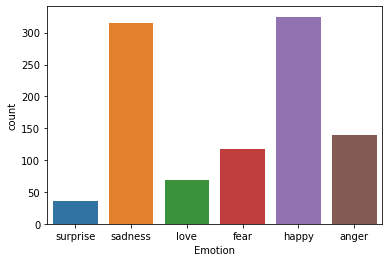

In [30]:
sns.countplot(df.Emotion)

## 4. Опциональный шаг: Проходимся по текстам стеммером

In [31]:
wordnet = WordNetLemmatizer()
df['Lemmatized'] = df['Cleaned'].apply(lambda x : [wordnet.lemmatize(i) for i in x])
df['Lemmatized'] = df['Lemmatized'].apply(lambda x : ' '.join([w for w in x]))
df['Lemmatized'] = df['Lemmatized'].apply(lambda x : ' '.join([w for w in x.split()]))

In [34]:
df['Emotion'] = df['Emotion'].map({'surprise': 0,
                                   'sadness': 1,
                                   'love': 2,
                                   'fear': 3,
                                   'happy': 4,
                                   'anger': 5
                                  })

In [35]:
df.head(3)

,Text,Emotion,Cleaned,Lemmatized
9904,i think im getting the feeling that were the w...,0,"[think, im, getting, feeling, weird, ones, usi...",think im getting feeling weird one using dryer...
843,i sound so entitled but you cant help but to f...,1,"[sound, entitled, cant, help, feel, disappoint...",sound entitled cant help feel disappointed eve...
7883,i decided to see if i could locate margaret or...,2,"[decided, see, could, locate, margaret, jeff, ...",decided see could locate margaret jeff feel lo...


## 5. Создаём матрицу TfIdf с помощью TfidfVectorizer

In [36]:
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.8,
    max_features = 2500,
    min_df = 0.002,
    use_idf = True,
    ngram_range = (1, 3)
)
z = tfidf_vectorizer.fit_transform(df['Lemmatized']).toarray()
z.shape

(1000, 1583)

## 6. Применяем sklearn.linear_model.LogisticRegression() (либо другой классификатор по вашему выбору) к получившейся матрице TfIdf, проводим классификацию (здесь и далее всё с помощью кросс-валидации!), выводим получившиеся метрики качества (accuracy для multiclass или f1 / classification_report для бинарной).

#### Fit model

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm


clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_validate(clf, z, df['Emotion'], cv=5, scoring=['accuracy'])

In [43]:
scores

{'fit_time': array([5.20798302, 5.12884879, 5.41766906, 5.89337516, 5.36870146]),
 'score_time': array([0.71655798, 0.71555805, 0.75853443, 0.7785213 , 0.71955681]),
 'test_accuracy': array([0.59 , 0.595, 0.57 , 0.575, 0.545])}

In [45]:
y_pred = clf.fit(z[:500], df['Emotion'][:500]).predict(z[500:])
print(classification_report(df['Emotion'][500:], y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.44      0.76      0.56       153
           2       1.00      0.03      0.06        35
           3       0.64      0.12      0.20        59
           4       0.53      0.68      0.59       167
           5       0.92      0.16      0.27        69

    accuracy                           0.50       500
   macro avg       0.59      0.29      0.28       500
weighted avg       0.58      0.50      0.43       500



## 7. Теперь самое интересное: оптимизация и подбор наилучших гиперпатаметров и способа предобработки текстов. Играемся с параметрами TfidfVectorizer: max_df, min_df, max_features, ngram_range ((1,2) или (1,3)), чтобы максимально повысить качество предсказаний (в качестве метрики качества для оптимизации: accuracy для многоклассовой и f1 для бинарной классификации).

---
---
### No lemmatization

#### Gridsearch

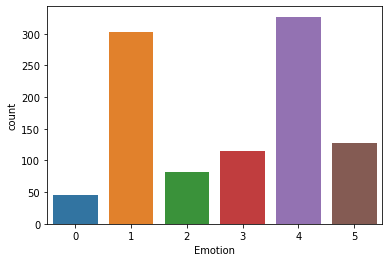

In [47]:
df = data.sample(1000)

df['Cleaned'] = df['Text'].str.replace('@', '')
df['Cleaned'] = df['Cleaned'].str.replace(r'http\S+', '')
df['Cleaned'] = df['Cleaned'].str.replace('[^a-zA-Z]', ' ')

df['Cleaned'] = df['Cleaned'].apply(lambda text : remove_stopwords(text.lower()))
df['Cleaned'] = df['Cleaned'].apply(lambda x : x.split())

df['Emotion'] = df['Emotion'].map({'surprise': 0,
                                   'sadness': 1,
                                   'love': 2,
                                   'fear': 3,
                                   'happy': 4,
                                   'anger': 5
                                  })

df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x]))
df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x.split()]))

sns.countplot(df.Emotion);

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


grid_params = {
    'tfidf__max_df': np.arange(0.5, 1, 0.1),
    'tfidf__min_df': np.arange(0.001, 0.01, 0.001),
    'tfidf__max_features': np.arange(2000, 5000, 500),
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'svm__C': np.arange(1, 5, 1),
    'svm__kernel': ['linear', 'poly', 'rbf']
}

pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('svm', svm.SVC())
    ]
)

gs = GridSearchCV(pipe, grid_params, n_jobs=-1, cv=5, verbose=2, scoring='accuracy')

In [50]:
%%time
gs = gs.fit(df['Cleaned'].values, df['Emotion'])

model = gs.best_estimator_
gs.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Wall time: 49min 20s


{'svm__C': 2,
 'svm__kernel': 'linear',
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 4500,
 'tfidf__min_df': 0.001,
 'tfidf__ngram_range': (1, 2)}

In [52]:
y_pred = model.predict(df['Cleaned'][500:])
print(classification_report(df['Emotion'][500:], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        52
           4       0.99      1.00      1.00       167
           5       1.00      0.99      0.99        72

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



---
---
### Lemmatization

In [53]:
wordnet = WordNetLemmatizer()
df['Lemmatized'] = df['Cleaned'].apply(lambda x: [i for i in x.split(' ')]).apply(lambda x : [wordnet.lemmatize(i) for i in x])
df['Lemmatized'] = df['Lemmatized'].apply(lambda x : ' '.join([w for w in x]))
df['Lemmatized'] = df['Lemmatized'].apply(lambda x : ' '.join([w for w in x.split()]))

In [54]:
df['Cleaned'].values[7]

'power tools coming hip gunslinger style british gas portraying contented family enjoying warm glow new central heat'

In [55]:
df['Lemmatized'].values[7]

'power tool coming hip gunslinger style british gas portraying contented family enjoying warm glow new central heat'

In [56]:
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer()),
        ('svm', svm.SVC())
    ]
)

lemm_gs = GridSearchCV(pipe, grid_params, n_jobs=-1, cv=5, verbose=2, scoring='accuracy')

In [57]:
%%time
lemm_gs = lemm_gs.fit(df['Lemmatized'].values, df['Emotion'].values)

lemm_model = lemm_gs.best_estimator_
lemm_gs.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Wall time: 50min 3s


{'svm__C': 2,
 'svm__kernel': 'linear',
 'tfidf__max_df': 0.5,
 'tfidf__max_features': 4500,
 'tfidf__min_df': 0.001,
 'tfidf__ngram_range': (1, 2)}

In [61]:
y_pred = lemm_model.predict(df['Cleaned'][500:])
print(classification_report(df['Emotion'][500:], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        52
           4       0.99      1.00      1.00       167
           5       1.00      0.99      0.99        72

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## 8. Подводим итоги: параметры наилучшей модели и получившиеся при них метрики классификации.

---
> **Итог:**
Лучшего качества достигли сразу две модели: с использованием лемматизации и без её использования.

In [62]:
gs.best_params_

{'svm__C': 2,
 'svm__kernel': 'linear',
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 4500,
 'tfidf__min_df': 0.001,
 'tfidf__ngram_range': (1, 2)}

---
---
> **Метрики:**

In [64]:
y_pred = model.predict(df['Cleaned'][500:])
print(classification_report(df['Emotion'][500:], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        52
           4       0.99      1.00      1.00       167
           5       1.00      0.99      0.99        72

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## 9. Строим confusion matrix

<AxesSubplot:>

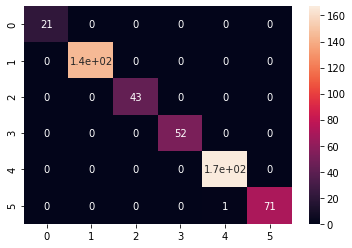

In [66]:
from sklearn.metrics import confusion_matrix


confusion_scores = confusion_matrix(df['Emotion'][500:], y_pred)
sns.heatmap(confusion_scores, annot=True)